In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
features_list = ['exclusive_use_area', 'date', 'key', 'supply_area', 'common_area',
 'total_household_count_of_area_type', 'age',
 'total_household_count_in_sites', 'min_subway_dist', 'min_school_dist',
 'total_parking_capacity_in_site', 'apartment_id', 'floor/lowest',
 'transaction_year_month', 'floor/tallest', 'room_id', 'year_of_completion',
 'foundation_year', 'floor', 'lowest_building_in_sites' ,'address_by_law_y',
 'cluster_N', 'apartment_building_count_in_sites', 'min_subway',
 'tallest_building_in_sites' ,'longitude', 'latitude' ,'transaction_month',
 'long_room_id', 'lat_room_id' ,'sch_cnt', 'address_by_law_3',
 'address_by_law' ,'latitude_x' ,'longitude_x' ,'station_id', 'longitude_y',
 'address_by_law_x' ,'latitude_y', 'address_by_law_2' ,'lat_apartment_id',
 'lat_school_code' ,'long_apartment_id', 'long_school_code',
 'transaction_year', 'lat_station_id' ,'long_station_id' ,'room_count',
 'sub_cnt', 'transaction_date_label_encoding' ,'class_operation',
 'bathroom_count', 'front_door_structure_label_encoding',
 'heat_type_label_encoding' ,'heat_fuel_label_encoding', 'school_class',
 'gender' ,'highschool_type' ,'operation_type' ,'3' ,'5', 'DL', '1', 'B1', '7',
 'B2', '4']

In [3]:
x_train = pd.read_csv('x_train.csv')
x_val = pd.read_csv('x_val.csv')
x_train = x_train[x_train['transaction_year'] > 2012]
y_train = x_train['log_target']
x_train = x_train[features_list]
features = x_train.columns.values
x_train = x_train.values

y_val = x_val['log_target']
x_val = x_val[features_list].values

x_full = np.concatenate((x_train, x_val), axis = 0)
y_full = np.concatenate((y_train, y_val))

print("train shape : ", x_train.shape)
print("val shape : ", x_val.shape)
print("full shape : ", x_full.shape)

train shape :  (835932, 67)
val shape :  (3906, 67)
full shape :  (839838, 67)


In [5]:
# n_estimators = 16612
# num_leaves = 0.846645682
# max_depth = 6
# min_child_samples = 182
# min_child_weight = 0.75775227
# subsample = 0.511530162
# colsample_bytree = 0.161080072

model = LGBMRegressor(n_estimators = 16612,
                    num_leaves = 60,
                    max_depth = 7,
                    min_child_samples = 412,
                    min_child_weight = 0.7349498388014041,
                    subsample = 0.7045232156120653,
                    colsample_bytree = 0.4263111923396467)
# model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.4263111923396467, importance_type='split',
       learning_rate=0.1, max_depth=7, min_child_samples=412,
       min_child_weight=0.7349498388014041, min_split_gain=0.0,
       n_estimators=16612, n_jobs=-1, num_leaves=60, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=0.7045232156120653, subsample_for_bin=200000,
       subsample_freq=0)

In [ ]:
# train score
train_pred = model.predict(x_train)
mse = mean_squared_error(np.expm1(y_train), np.expm1(train_pred))
np.sqrt(mse)

In [6]:
# test score
y_pred = model.predict(x_val)
mse = mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
np.sqrt(mse)

48973214.34315309

**1월 27일 1530**<br/> 
model : LGBMRegressor(num_leaves=127,n_estimators= 2000,min_child_weight=0.001,learning_rate=0.05)<br/>
data : 기준 데이터<br/>
train : 25155106.69726805<br/>
val : 54813537.557590075<br/>
<br/>
**1월 27일 1600**<br/> 
model : LGBMRegressor(num_leaves=127,n_estimators= 2000,min_child_weight=0.001,learning_rate=0.05)<br/>
data : 기준 데이터 + lr feature 투입 (78개 feature) <br/>
train : 23253586.681531854 <br/>
val : 54786309.668090515(#f : 78) -> 55382608.821455(#f : 50) -> 54920095.54149779(#f : 46) <br/>
<br/>
**1월 27일 1630**<br/> 
model : LGBMRegressor(num_leaves=127,n_estimators= 2000,min_child_weight=0.001,learning_rate=0.05)<br/>
data : 기준 데이터 - 중복 지형 정보 제거 + lr feature 투입 (72개 feature) <br/>
train : 23291085.763740953 <br/>
val : 55263851.20688418 (#f : 72) -> 55336659.41536262 (#f : 47) <br/>
<br/>
**1월 27일 1900**<br/> 
model : LGBMRegressor(num_leaves=127,n_estimators= 2000,min_child_weight=0.001,learning_rate=0.05)<br/>
data : 기준 데이터  + lr feature 투입 + id들 rank encoding featur 추가 (84개 feature) <br/>
train : 23219708.011366047 <br/>
val :  54828882.103836425 (#f : 84) -> 54671735.843156815 (#f : 53) <br/>
<br/>
n_estimators =  14969
num_leaves =  0.5734391200214534
max_depth =  7
min_child_samples =  589
min_child_weight =  0.8548338088918777
subsample =  0.6119384098464146
colsample_bytree =  0.2668212102503767


model =LGBMRegressor(n_estimators = n_estimators, 
                         num_leaves = max(2, int(2**(num_leaves * max_depth) - 1)), 
                         max_depth = max_depth,
                         min_child_samples = min_child_samples,
                         min_child_weight = min_child_weight,
                         subsample = subsample,
                         colsample_bytree = colsample_bytree)

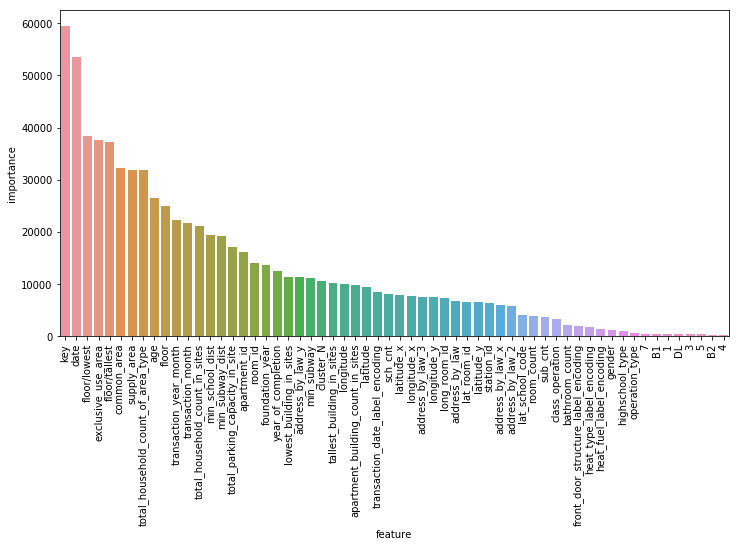

In [20]:
meta = pd.DataFrame(np.concatenate((features.reshape(-1,1), model.feature_importances_.reshape(-1,1)) , axis = 1))
meta = meta.sort_values(by = 1, ascending = False).reset_index(drop = True)
meta.columns = ['feature', 'importance']

plt.figure(figsize = (12, 6))
sns.barplot(x = 'feature', y = 'importance', data = meta)
plt.xticks(rotation = 'vertical')
plt.show()

In [7]:
cum = np.zeros(meta.shape[0])
for i, row in meta.iterrows():
    if i == 0:
        cum[i] = row[1]
    else:
        cum[i] = cum[i-1] + row[1]
        
meta['cum'] = cum
meta['cum_rate'] = meta['cum'] / cum[-1]
feature_drop = meta.loc[:73, 'feature'].values.tolist()
meta

,feature,importance,cum,cum_rate
0,key,33023,33023.0,0.094918
1,date,20516,53539.0,0.153888
2,exclusive_use_area,20346,73885.0,0.212369
3,floor/tallest,16299,90184.0,0.259217
4,common_area,16265,106449.0,0.305968
5,total_household_count_of_area_type,15988,122437.0,0.351922
6,floor/lowest,15644,138081.0,0.396888
7,supply_area,15588,153669.0,0.441693
8,age,11838,165507.0,0.475719
9,min_subway_dist,11365,176872.0,0.508386


## 총학습

In [21]:
model.fit(x_full, y_full)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.4263111923396467, importance_type='split',
       learning_rate=0.1, max_depth=7, min_child_samples=412,
       min_child_weight=0.7349498388014041, min_split_gain=0.0,
       n_estimators=16612, n_jobs=-1, num_leaves=60, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=0.7045232156120653, subsample_for_bin=200000,
       subsample_freq=0)

In [ ]:
x_test = pd.read_csv('x_test.csv')
sub = pd.read_csv('data/submission.csv')
TRAIN = pd.read_csv('data/train.csv')
same_instance = pd.read_csv('data/same_instance.csv')
same_instance.columns = ['apartment_id', 'key']

ret = []
for i, row in same_instance.iterrows():
    ret.append(TRAIN[TRAIN['key'] == row['key']]['transaction_real_price'].values[0])
same_instance['transaction_real_price'] = ret

sub['1st'] = pd.merge(left = x_test, right = same_instance[['apartment_id', 'transaction_real_price']], on = 'apartment_id', how = 'left')['transaction_real_price_y']

x_test = x_test[features_list].values
test_pred = np.expm1(model.predict(x_test))
sub['2nd'] = test_pred

sub = sub.fillna(-1)
ret = []
for i, row in sub.iterrows():
    if row['1st'] != -1:
        ret.append(row['1st'])
    else:
        ret.append(row['2nd'])
sub['transaction_real_price'] = ret

sub = sub.drop(['1st', '2nd'], axis = 1)

sub.to_csv("sub.csv", encoding = False, index = False)

sub(0129_1)<br/>
features_list = `['exclusive_use_area', 'date', 'key', 'supply_area', 'common_area', 'total_household_count_of_area_type', 'age', 'total_household_count_in_sites', 'min_subway_dist', 'min_school_dist', 'total_parking_capacity_in_site', 'apartment_id', 'floor/lowest', 'transaction_year_month', 'floor/tallest', 'room_id', 'year_of_completion', 'foundation_year', 'floor', 'lowest_building_in_sites' ,'address_by_law_y', 'cluster_N', 'apartment_building_count_in_sites', 'min_subway', 'tallest_building_in_sites' ,'longitude', 'latitude' ,'transaction_month', 'long_room_id', 'lat_room_id' ,'sch_cnt', 'address_by_law_3', 'address_by_law' ,'latitude_x' ,'longitude_x' ,'station_id', 'longitude_y', 'address_by_law_x' ,'latitude_y', 'address_by_law_2' ,'lat_apartment_id', 'lat_school_code' ,'long_apartment_id', 'long_school_code', 'transaction_year', 'lat_station_id' ,'long_station_id' ,'room_count', 'sub_cnt', 'transaction_date_label_encoding' ,'class_operation', 'bathroom_count', 'front_door_structure_label_encoding','heat_type_label_encoding' ,'heat_fuel_label_encoding', 'school_class', 'gender' ,'highschool_type' ,'operation_type' ,'3' ,'5', 'DL', '1', 'B1', '7', 'B2', '4']`<br/>
val : 47031743.12021067 <br/>
n_estimators =  28997<br/>
num_leaves =  0.5528210952049166<br/>
max_depth =  7<br/>
min_child_samples =  169<br/>
min_child_weight =  0.850359167657365<br/>
subsample =  0.1463978283110154<br/>
colsample_bytree =  0.9978180434130473<br/>

## 오차 분석

In [ ]:
residual = pd.DataFrame(np.concatenate((np.expm1(y_val.values.reshape(-1,1)), np.expm1(y_pred.reshape(-1,1))), axis = 1))
residual.columns = ['true', 'pred']
residual['residual'] = np.abs(residual['true'] - residual['pred'])
residual['relative_error'] = residual['residual'] / residual['true']
residual.sort_values(by = 'residual', ascending = False)

In [ ]:
x_train = pd.read_csv('x_train.csv')
x_train = x_train[x_train['transaction_year'] > 2013]
x_val = pd.read_csv('x_val.csv')

In [ ]:
case = 1985
room_id = x_val.loc[case,:].room_id
apartment_id = x_val.loc[case,:].apartment_id

x_train[(x_train['room_id'] == room_id)]